In [1]:
#Importing the Libraries
import pandas as pd

In [2]:
import pandas as pd    
import matplotlib.pyplot as plt

In [3]:
# Importing the Dataset
data=pd.read_csv('heart.csv')

In [4]:
# Taking Care of Missing Values
data.isnull().sum()


age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
caa         0
thall       0
output      0
dtype: int64

In [5]:
#Taking Care of Duplicate Values
data_dup=data.duplicated().any()

In [6]:
data_dup

True

In [7]:
data=data.drop_duplicates()

In [8]:
data_dup=data.duplicated().any()

In [9]:
data_dup

False

In [10]:
# Data Processing
cate_val=[]
cont_val=[]
for column in data.columns:
    if data[column].nunique() <=10:
        cate_val.append(column)
    else:
        cont_val.append(column)

In [11]:
cate_val

['sex', 'cp', 'fbs', 'restecg', 'exng', 'caa', 'thall', 'output']

In [12]:
cont_val

['age', 'trtbps', 'chol', 'thalachh']

In [13]:
#Encoding Categorical Data
cate_val


['sex', 'cp', 'fbs', 'restecg', 'exng', 'caa', 'thall', 'output']

In [14]:
data['cp'].unique()

array([3, 2, 1, 0])

In [15]:
cate_val.remove('sex')
cate_val.remove('output')
data =pd.get_dummies(data,columns = cate_val,drop_first=True)

In [16]:
data.head()

,age,sex,trtbps,chol,thalachh,output,cp_1,cp_2,cp_3,fbs_1,restecg_1,restecg_2,exng_1,caa_1,caa_2,caa_3,caa_4,thall_1,thall_2,thall_3
0,63,1,145,233,150,1,0,0,1,1,0,0,0,0,0,0,0,1,0,0
1,37,1,130,250,187,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0
2,41,0,130,204,172,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0
3,56,1,120,236,178,1,1,0,0,0,1,0,0,0,0,0,0,0,1,0
4,57,0,120,354,163,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0


In [17]:
#Feature Scaling
data.head()

,age,sex,trtbps,chol,thalachh,output,cp_1,cp_2,cp_3,fbs_1,restecg_1,restecg_2,exng_1,caa_1,caa_2,caa_3,caa_4,thall_1,thall_2,thall_3
0,63,1,145,233,150,1,0,0,1,1,0,0,0,0,0,0,0,1,0,0
1,37,1,130,250,187,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0
2,41,0,130,204,172,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0
3,56,1,120,236,178,1,1,0,0,0,1,0,0,0,0,0,0,0,1,0
4,57,0,120,354,163,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0


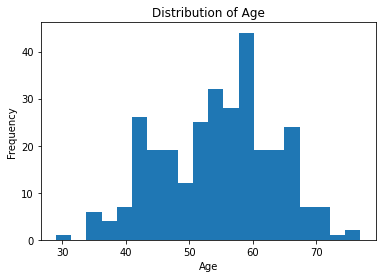

In [18]:
import matplotlib.pyplot as plt
# Plot a histogram of a numerical variable
plt.hist(data['age'], bins=20)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Age')
plt.show()

#

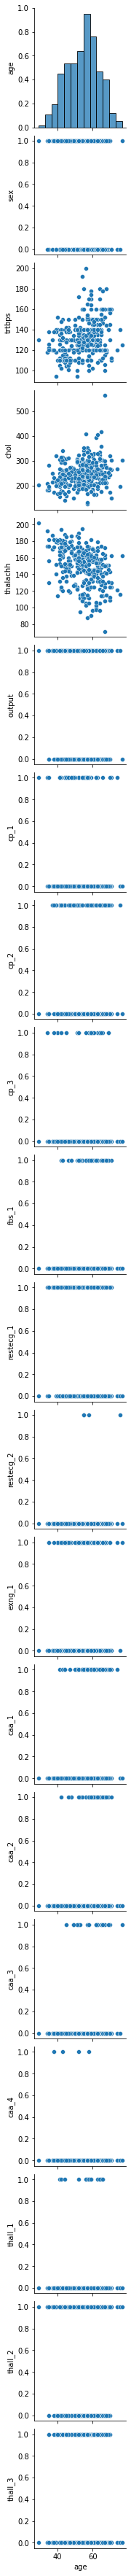

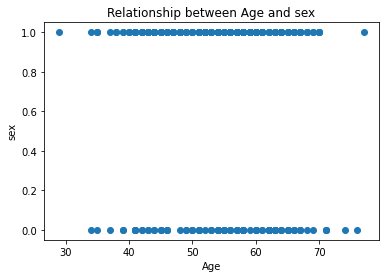

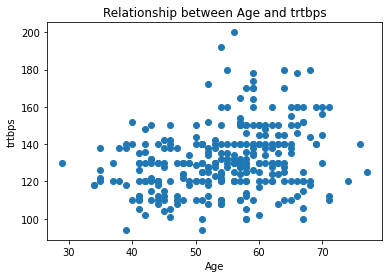

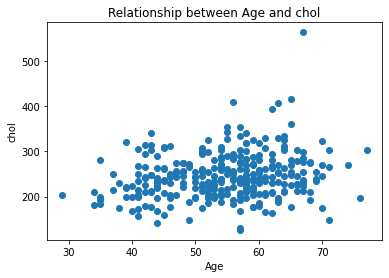

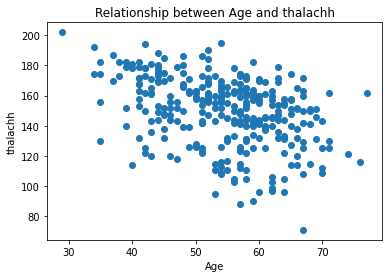

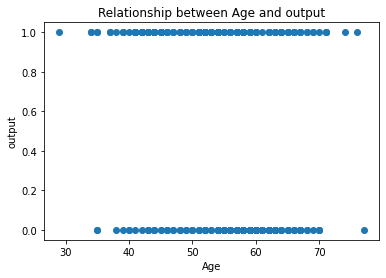

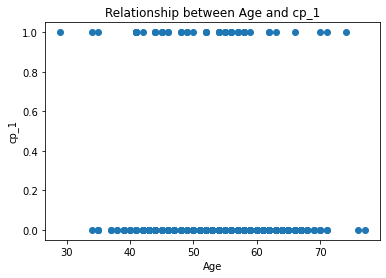

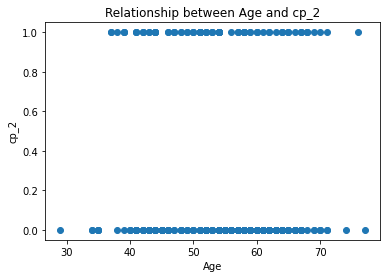

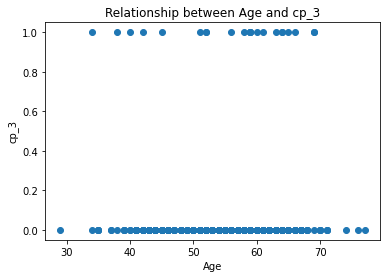

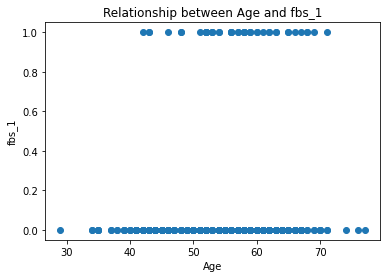

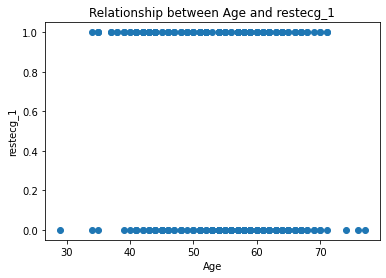

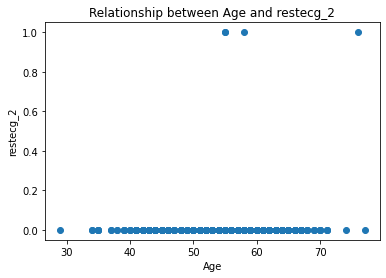

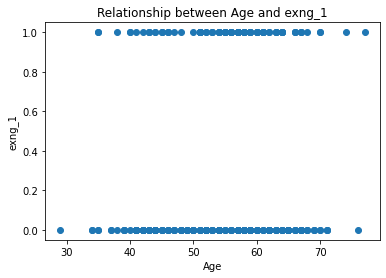

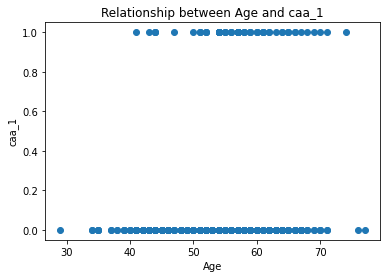

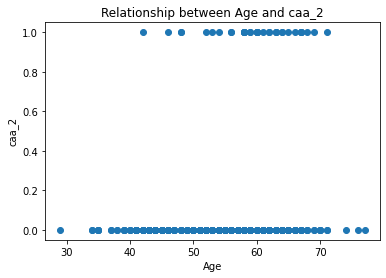

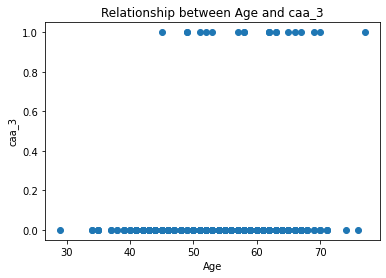

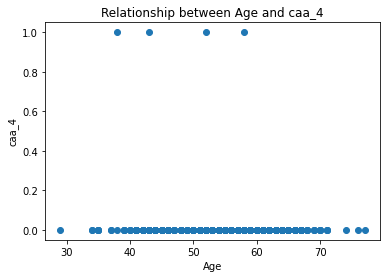

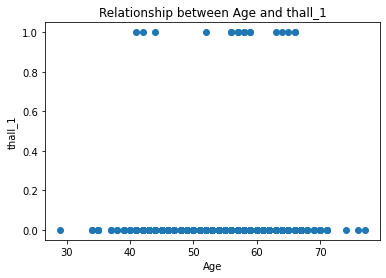

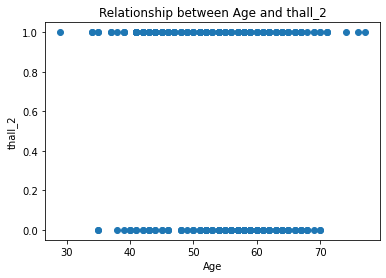

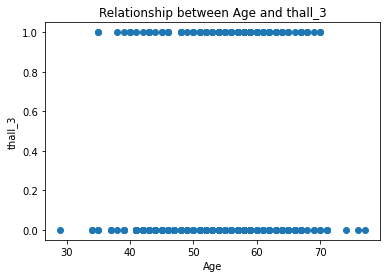

In [19]:
import numpy as np
import seaborn as sns
sns.pairplot(data, x_vars=['age'], y_vars=data.select_dtypes(include=[np.number]).columns.tolist(), kind='scatter')
plt.show()

# Create separate scatterplots of age against other numerical variables
for col in data.select_dtypes(include=[np.number]).columns:
    if col != 'age':
        plt.scatter(data['age'], data[col])
        plt.xlabel('Age')
        plt.ylabel(col)
        plt.title(f'Relationship between Age and {col}')
        plt.show()

In [20]:
from sklearn.preprocessing import StandardScaler

In [21]:
st= StandardScaler()
data[cont_val] = st.fit_transform(data[cont_val])


In [22]:
data.head()

,age,sex,trtbps,chol,thalachh,output,cp_1,cp_2,cp_3,fbs_1,restecg_1,restecg_2,exng_1,caa_1,caa_2,caa_3,caa_4,thall_1,thall_2,thall_3
0,0.949794,1,0.764066,-0.261285,0.018826,1,0,0,1,1,0,0,0,0,0,0,0,1,0,0
1,-1.928548,1,-0.091401,0.067741,1.636979,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0
2,-1.485726,0,-0.091401,-0.822564,0.980971,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0
3,0.174856,1,-0.661712,-0.203222,1.243374,1,1,0,0,0,1,0,0,0,0,0,0,0,1,0
4,0.285561,0,-0.661712,2.080602,0.587366,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0


In [23]:
#Splitting The Dataset Into The Training Set And Test Set
X = data.drop('output',axis=1)


In [25]:
y=data['output']

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=41)

In [28]:
y_test

58     1
200    0
206    0
174    0
176    0
      ..
42     1
273    0
191    0
240    0
299    0
Name: output, Length: 61, dtype: int64

In [29]:
#Logistic Regression
data.head()

,age,sex,trtbps,chol,thalachh,output,cp_1,cp_2,cp_3,fbs_1,restecg_1,restecg_2,exng_1,caa_1,caa_2,caa_3,caa_4,thall_1,thall_2,thall_3
0,0.949794,1,0.764066,-0.261285,0.018826,1,0,0,1,1,0,0,0,0,0,0,0,1,0,0
1,-1.928548,1,-0.091401,0.067741,1.636979,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0
2,-1.485726,0,-0.091401,-0.822564,0.980971,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0
3,0.174856,1,-0.661712,-0.203222,1.243374,1,1,0,0,0,1,0,0,0,0,0,0,0,1,0
4,0.285561,0,-0.661712,2.080602,0.587366,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0


In [30]:
from sklearn.linear_model import LogisticRegression

In [31]:
log = LogisticRegression()
log.fit(X_train,y_train)

LogisticRegression()

In [32]:
y_pred1 = log.predict(X_test)

In [33]:
from sklearn.metrics import accuracy_score

In [35]:
accuracy_score(y_test,y_pred1)

0.7868852459016393

In [36]:
#SVC
from sklearn import svm

In [37]:
svm = svm.SVC()

In [38]:
svm.fit(X_train,y_train)

SVC()

In [39]:
y_pred2=svm.predict(X_test)

In [40]:
accuracy_score(y_test,y_pred2)

0.7868852459016393

In [41]:
#KNeighbors Classifier
from sklearn.neighbors import KNeighborsClassifier

In [42]:
knn = KNeighborsClassifier()

In [43]:
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [44]:
y_pred3=knn.predict(X_test)

In [45]:
accuracy_score(y_test,y_pred3)

0.8032786885245902

In [46]:
#Non-Linear ML Algorithms
data = pd.read_csv('heart.csv')

In [47]:
X = data.drop('output',axis=1)
y=data['output']


In [48]:
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2,
                                                random_state=42)

In [49]:
#. Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier

In [50]:
dt = DecisionTreeClassifier()

In [51]:
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [52]:
y_pred4= dt.predict(X_test)


In [53]:
accuracy_score(y_test,y_pred4)

0.7704918032786885

In [54]:
#Random Forest Classifier

from sklearn.ensemble import RandomForestClassifier

In [55]:
rf = RandomForestClassifier()

In [56]:
rf.fit(X_train,y_train)

RandomForestClassifier()

In [57]:
y_pred5=rf.predict(X_test)

In [58]:
accuracy_score(y_test,y_pred5)

0.8360655737704918

In [59]:
# Gradient Boosting Classifier
from sklearn.ensemble import GradientBoostingClassifier

In [60]:
gbc = GradientBoostingClassifier()

In [61]:
gbc.fit(X_train,y_train)

GradientBoostingClassifier()

In [62]:
y_pred6=gbc.predict(X_test)


In [63]:
accuracy_score(y_test,y_pred6)

0.8360655737704918

In [64]:
final_data = pd.DataFrame({'Models':['LR','SVM','KNN','DT','RF','GB'],
                          'ACC':[78.6,78.6,80.3,77,81.9,83.6]})        

In [65]:
final_data

,Models,ACC
0,LR,78.6
1,SVM,78.6
2,KNN,80.3
3,DT,77.0
4,RF,81.9
5,GB,83.6


In [66]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, precision_recall_fscore_support

# Use the classifier to predict the labels for the test data
y_pred = rf.predict(X_test)

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Convert confusion matrix into a DataFrame
cm_df = pd.DataFrame(cm, index=['Actual Negative', 'Actual Positive'], columns=['Predicted Negative', 'Predicted Positive'])

# Print the confusion matrix
print("Confusion Matrix:")
print(cm_df)
print()

# Calculate precision, recall, and F1 score from the confusion matrix
precision, recall, f1_score, support = precision_recall_fscore_support(y_test, y_pred)

# Convert precision, recall, and F1 score into a DataFrame
metrics_df = pd.DataFrame({'Precision': precision, 'Recall': recall, 'F1 Score': f1_score}, index=['Negative', 'Positive'])

# Print the precision, recall, and F1 score
print("Metrics:")
print(metrics_df)


Confusion Matrix:
                 Predicted Negative  Predicted Positive
Actual Negative                  24                   5
Actual Positive                   5                  27

Metrics:
          Precision    Recall  F1 Score
Negative   0.827586  0.827586  0.827586
Positive   0.843750  0.843750  0.843750


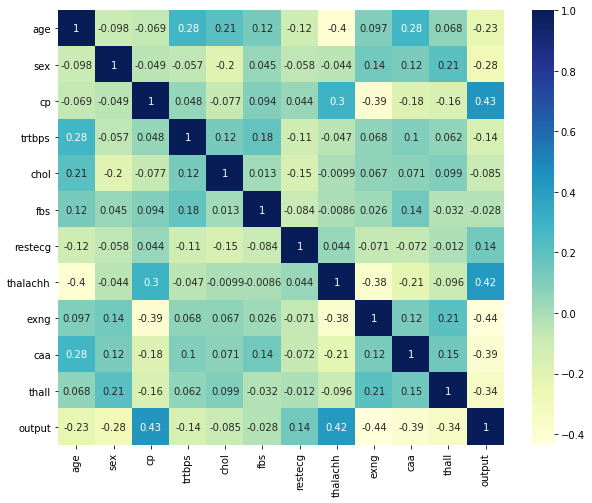

In [64]:
corr = data.corr()

# Generate a heatmap plot of the correlation matrix
plt.figure(figsize=(10,8))

# Create a heatmap using Seaborn
sns.heatmap(corr, cmap="YlGnBu", annot=True)

# Show the plot
plt.show()

In [65]:
#bargraph
import seaborn as sns

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Models', ylabel='ACC'>

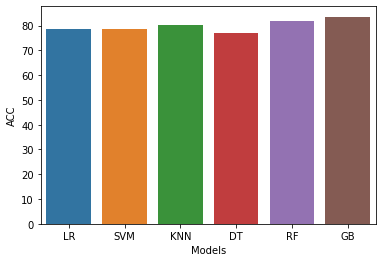

In [66]:
sns.barplot(final_data['Models'],final_data['ACC'])

In [67]:
X=data.drop('output',axis=1)
y=data['output']

In [68]:
from sklearn.ensemble import RandomForestClassifier

In [69]:
rf = RandomForestClassifier()
rf.fit(X,y)

RandomForestClassifier()

In [70]:
# Prediction on New Data
import pandas as pd

In [71]:
new_data = pd.DataFrame({
    'age':52,
    'sex':1,
    'cp':0,
    'trestbps':125,
    'chol':212,
    'fbs':0,
    'restecg':1,
    'thalach':168,
    'exang':0,
    'ca':2,
    'thall':3,    
},index=[0])

In [72]:
new_data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,ca,thall
0,52,1,0,125,212,0,1,168,0,2,3


In [73]:
p = rf.predict(new_data)
if p[0]==1:
    print(" Hay patient No Disease ")
else:
    print("Disease is there")

Disease is there


In [74]:
#. Save Model Using Joblib
import joblib

In [75]:
joblib.dump(rf,'model_joblib_heart')

['model_joblib_heart']

In [76]:
model=joblib.load('model_joblib_heart')

In [77]:
model.predict(new_data)

array([0])

In [78]:
data.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,caa,thall,output
0,63,1,3,145,233,1,0,150,0,0,1,1
1,37,1,2,130,250,0,1,187,0,0,2,1
2,41,0,1,130,204,0,0,172,0,0,2,1
3,56,1,1,120,236,0,1,178,0,0,2,1
4,57,0,0,120,354,0,1,163,1,0,2,1


In [79]:
data.tail()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,caa,thall,output
298,57,0,0,140,241,0,1,123,1,0,3,0
299,45,1,3,110,264,0,1,132,0,0,3,0
300,68,1,0,144,193,1,1,141,0,2,3,0
301,57,1,0,130,131,0,1,115,1,1,3,0
302,57,0,1,130,236,0,0,174,0,1,2,0


In [80]:
#GUI
from tkinter import*
import joblib

In [1]:
from tkinter import *
import joblib
import numpy as np
from sklearn import *
def show_entry_fields():
    p1=int(e1.get())
    p2=int(e2.get())
    p3=int(e3.get())
    p4=int(e4.get())
    p5=int(e5.get())
    p6=int(e6.get())
    p7=int(e7.get())
    p8=int(e8.get())
    p9=int(e9.get())
    p10=float(e10.get())
    p11=int(e11.get())
    
    model = joblib.load('model_joblib_heart')
    result=model.predict([[p1,p2,p3,p4,p5,p6,p7,p8,p8,p10,p11]])
    
    if result == 0:
        Label(master, text="No Heart Disease").grid(row=31)
    else:
        Label(master, text="Possibility of Heart Disease").grid(row=31)
    
    
master = Tk()
master.title("Heart Disease Prediction")


label = Label(master, text = "Heart Disease Prediction System"
                          , bg = "yellow", fg = "black"). \
                               grid(row=0,columnspan=2)


Label(master, text="Enter Your Age").grid(row=1)
Label(master, text="Male Or Female [1/0]").grid(row=2)
Label(master, text="Enter Value of CP(Cerebral palsy)").grid(row=3)
Label(master, text="Enter Value of trestbps(resting blood)").grid(row=4)
Label(master, text="Enter Value of chol").grid(row=5)
Label(master, text="Enter Value of fbs").grid(row=6)
Label(master, text="Enter Value of restecg").grid(row=7)
Label(master, text="Enter Value of thalach").grid(row=8)
Label(master, text="Enter Value of exang(Exercise induced angina )").grid(row=9)
Label(master, text="Enter Value of ca(coronary artery").grid(row=10)
Label(master, text="Enter Value of thallium stress").grid(row=11)



e1 = Entry(master)
e2 = Entry(master)
e3 = Entry(master)
e4 = Entry(master)
e5 = Entry(master)
e6 = Entry(master)
e7 = Entry(master)
e8 = Entry(master)
e9 = Entry(master)
e10 = Entry(master)
e11 = Entry(master)


e1.grid(row=1, column=1)
e2.grid(row=2, column=1)
e3.grid(row=3, column=1)
e4.grid(row=4, column=1)
e5.grid(row=5, column=1)
e6.grid(row=6, column=1)
e7.grid(row=7, column=1)
e8.grid(row=8, column=1)
e9.grid(row=9, column=1)
e10.grid(row=10, column=1)
e11.grid(row=11, column=1)




Button(master, text='Predict', command=show_entry_fields).grid()

mainloop()

model=joblib.load('model_joblib-heart')